D.S. Parker  &copy; 2016

# Graph mining of Data Science Startups

In [3]:
import sys
import os

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

ImportError: No module named 'networkx'

In [2]:
Startups = pd.read_csv('data_science_startups.tsv', sep='\t')
Startups.shape

(47, 14)

In [3]:
Startups.head()


,name,permalink,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,Aerospike,/organization/aerospike,http://www.aerospike.com,Analytics|Big Data|Databases|Real Time,22000000,operating,USA,CA,SF Bay Area,Mountain View,3,2009-02-25,2011-03-30,2014-06-24
1,Airtable,/organization/airtable,https://airtable.com/,Visualization|Mobile,10600000,operating,USA,CA,SF Bay Area,San Francisco,3,2012-01-01,2013-03-18,2015-06-29
2,Alation,/organization/alation,http://alation.com/,Big Data|Databases|IT,9000000,operating,USA,CA,SF Bay Area,Redwood City,1,2012-01-01,2015-03-04,2015-03-04
3,Altiscale,/organization/altiscale,http://www.altiscale.com,Big Data,42000000,operating,USA,CA,SF Bay Area,Palo Alto,2,2012-01-01,2013-06-13,2014-11-26
4,Apptimize,/organization/apptimize,http://apptimize.com,Enterprise Software,6100000,operating,USA,CA,SF Bay Area,Menlo Park,4,2013-01-01,2013-06-01,2015-02-17


# Display Startups by the City in which they are located

In [87]:
G=nx.Graph()

for x in Startups[['name', 'city']].values:
    startup = x[0].replace(' ','_')
    city = x[1].replace(' ','_')
    G.add_edge( startup, city )
     
city_adjacency = [
   ('San_Francisco', 'San_Ramon'),
   ('San_Mateo', 'San_Francisco'),
   ('Redwood_City', 'San_Mateo'),
   ('Menlo_Park', 'Redwood_City'),
   ('Palo_Alto', 'Menlo_Park'),
   ('Mountain_View', 'Palo_Alto'),
   ('Sunnyvale', 'Mountain_View'),
   ('Santa_Clara', 'Sunnyvale'),
   ('San_Jose', 'Santa_Clara'),
   ('Cupertino', 'Sunnyvale'),
   ('Cupertino', 'Santa_Clara'),
   ('Cupertino', 'San_Jose'),
   ('Los_Gatos', 'Cupertino'),
   ('Los_Gatos', 'San_Jose')]

for x, y in city_adjacency:
    x_ = x.replace(' ','_')
    y_ = y.replace(' ','_')
    G.add_edge( x_, y_ )


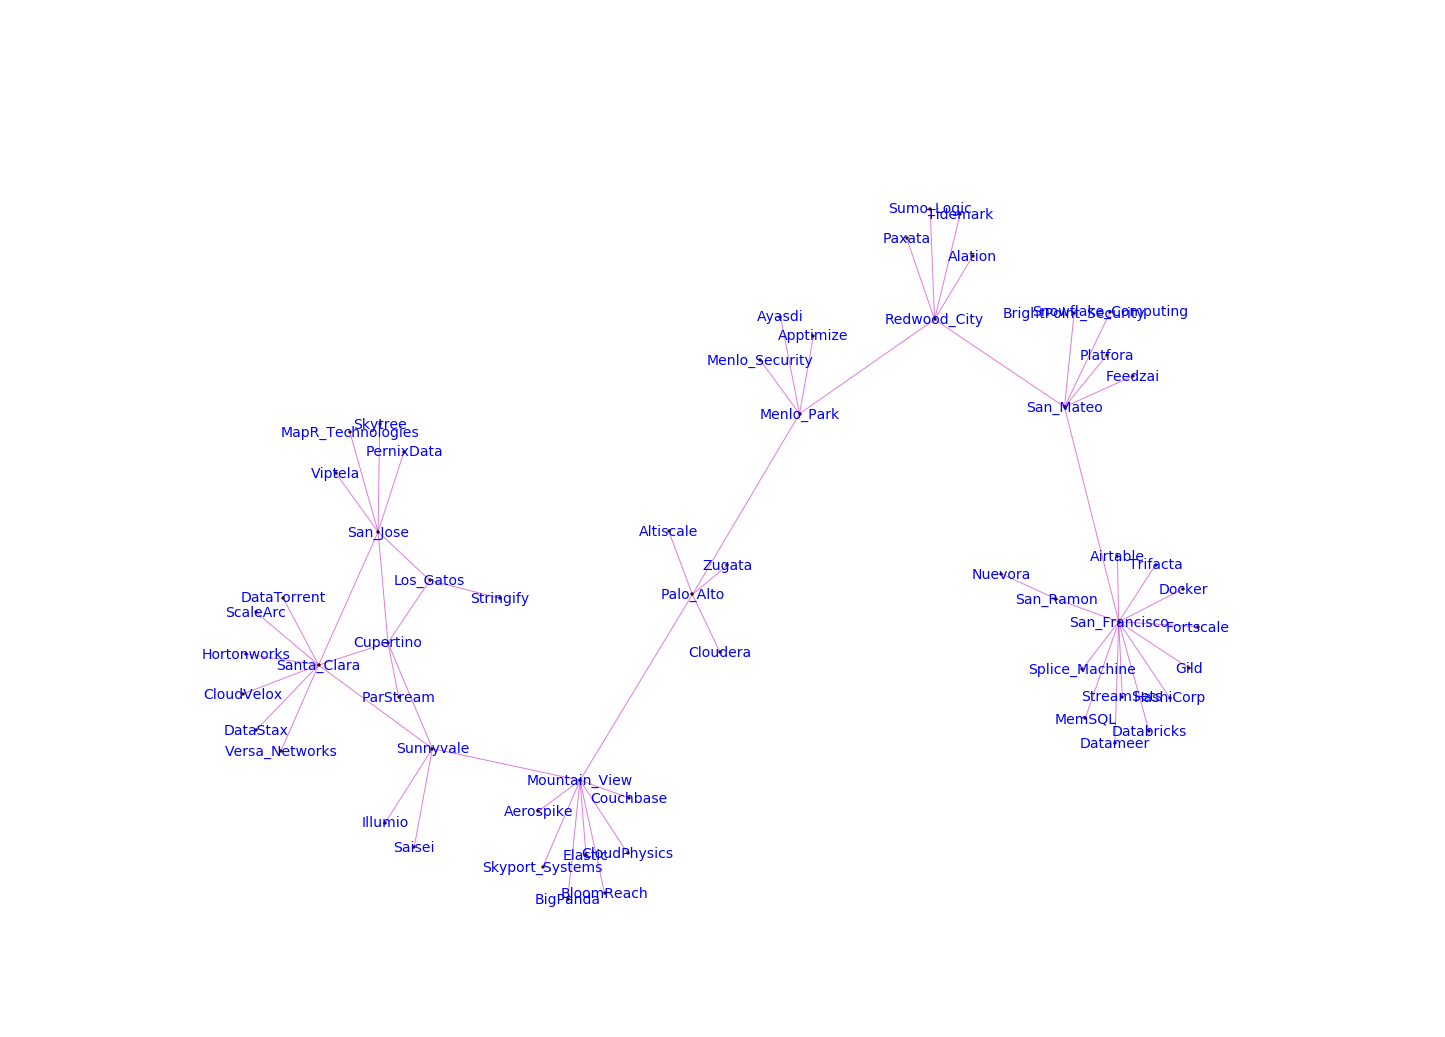

In [134]:
plt.figure(figsize=(25,18))

pos = nx.fruchterman_reingold_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=5)

nx.draw_networkx_edges(G, pos, edgelist=[(u,v) for (u,v,d) in G.edges(data=True)], width=1, edge_color="m", alpha=0.5)

nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif', font_color="b", alpha=0.4)

plt.axis('off')

plt.show()

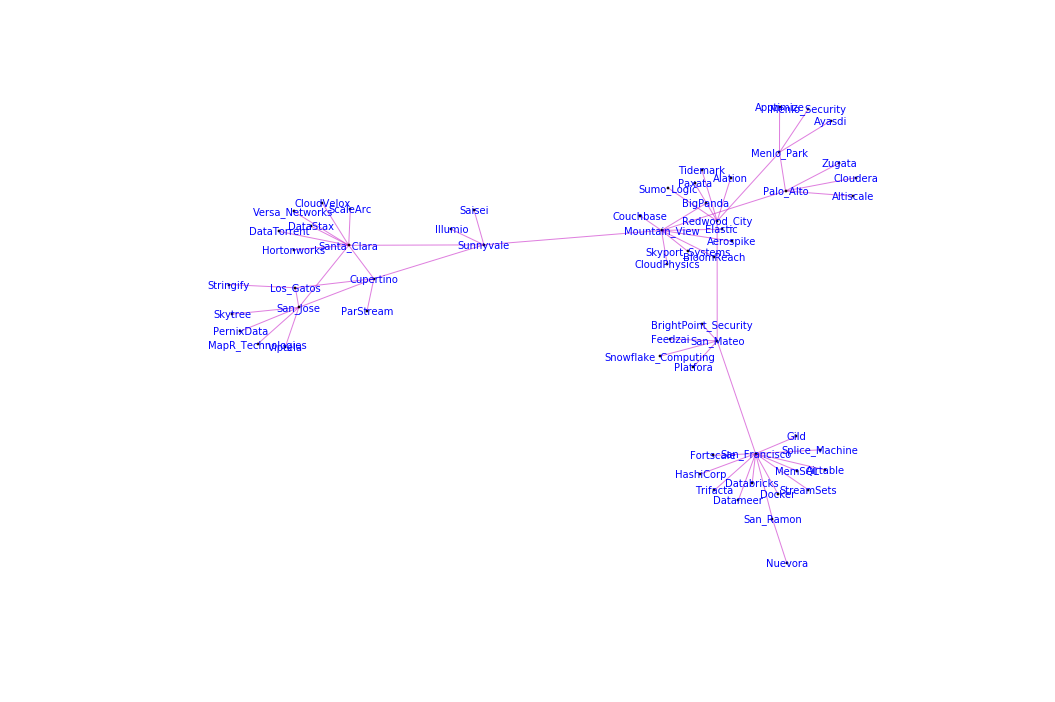

In [131]:
plt.figure(figsize=(18,12))

pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=3)

# edges
nx.draw_networkx_edges(G, pos, edgelist=[(u,v) for (u,v,d) in G.edges(data=True)], width=1, edge_color="m", alpha=0.5)

# labels
nx.draw_networkx_labels(G, pos, font_size=10,font_color="b",font_family='sans-serif', alpha=0.4)

plt.axis('off')

plt.show()

# Display Startups by the sectors they are involved in

In [71]:
Gs = nx.Graph()

for x in Startups[['name', 'category_list']].values:
    startup = x[0].replace(' ','_')
    sectors = x[1].split('|')
    for sector in sectors:
        Gs.add_edge( startup, sector.replace(' ','_') )

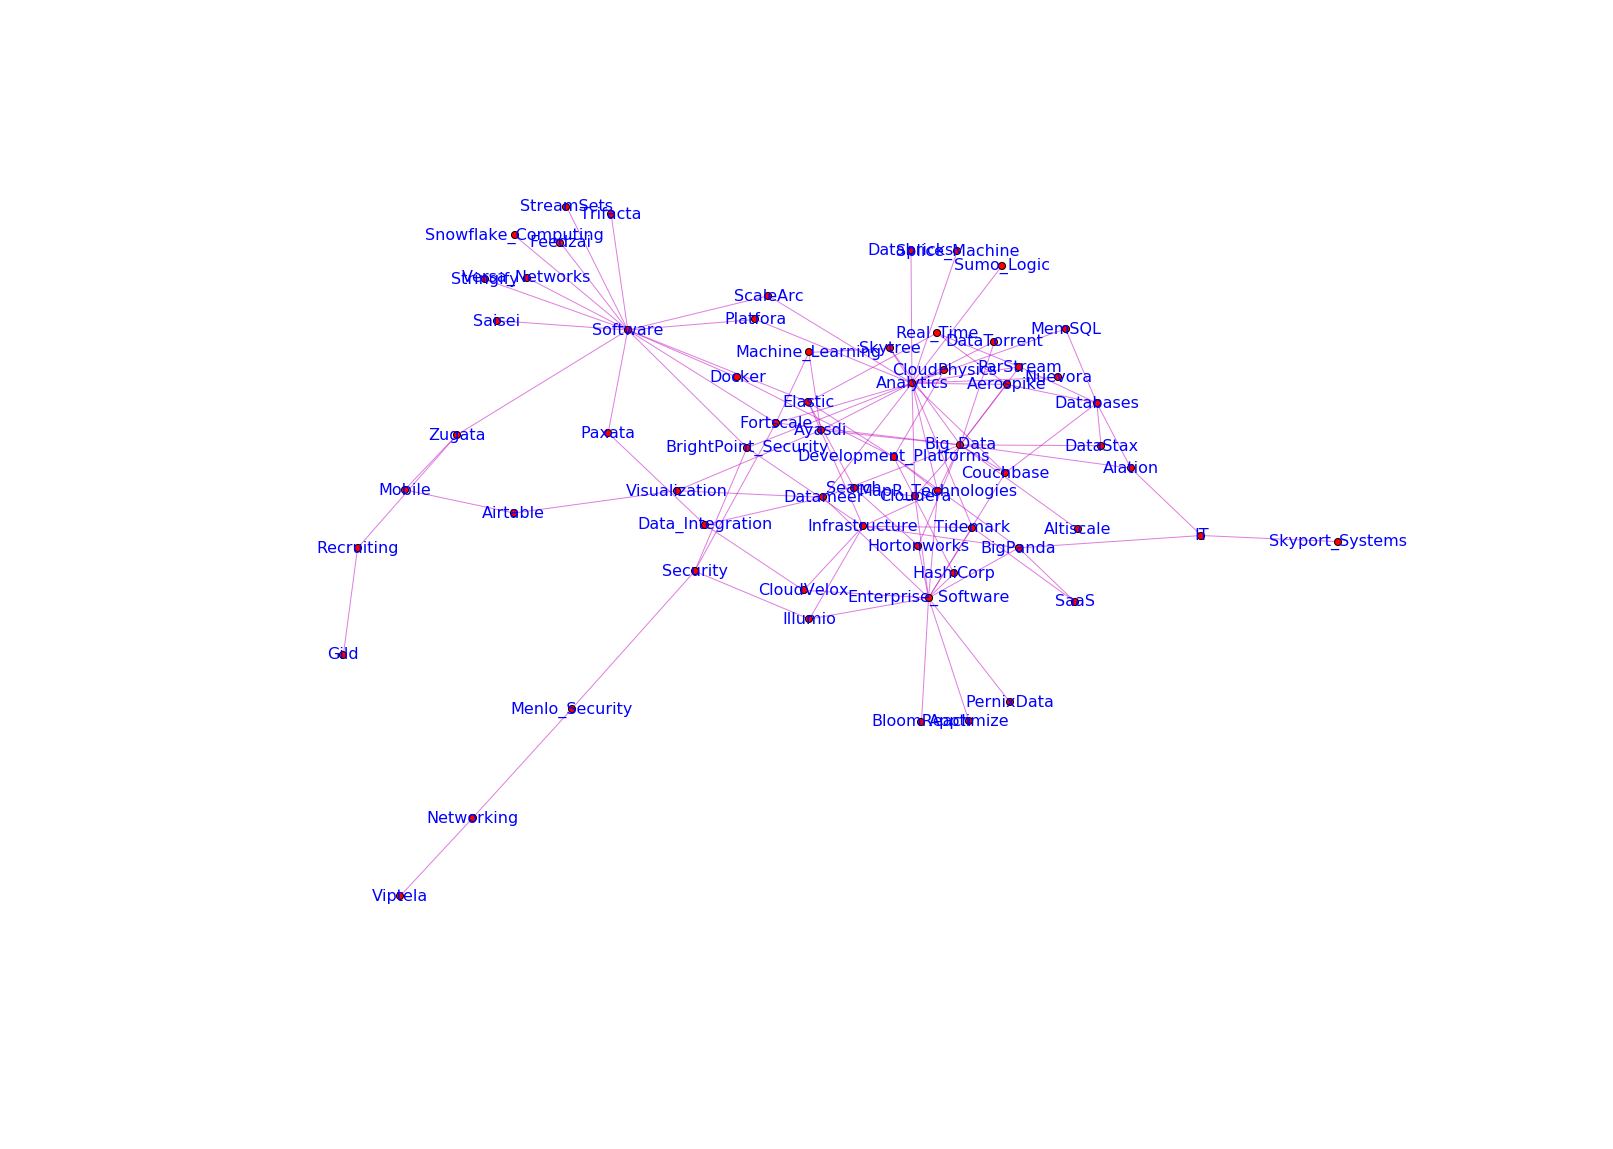

In [130]:
plt.figure(figsize=(28,20))

pos = nx.fruchterman_reingold_layout(Gs) # positions for all nodes

nx.draw_networkx_nodes(Gs, pos, node_size=50)

nx.draw_networkx_edges(Gs, pos, edgelist=[(u,v) for (u,v,d) in Gs.edges(data=True)], width=1, edge_color="m", alpha=0.5)

nx.draw_networkx_labels(Gs, pos, font_size=16, font_family='sans-serif', font_color="b", alpha=0.2)

plt.axis('off')

plt.show()

# Display Startups along with their Investors

In [55]:
Startups_and_Investors = pd.read_csv('data_science_startups_and_investors.tsv', sep='\t')
Startups_and_Investors.shape
Startups_and_Investors.columns

Index([u'name', u'permalink', u'homepage_url', u'category_list',
       u'funding_total_usd', u'status', u'country_code', u'state_code',
       u'region', u'city', u'funding_rounds', u'founded_at',
       u'first_funding_at', u'last_funding_at', u'investor',
       u'unedited_categories', u'raised_amount_usd'],
      dtype='object')

In [76]:
Gi = nx.Graph()

def fixup(s):
   return s.replace('-','_').replace('(','_').replace(')','_').replace('&','_').replace('/','_').replace('.','_').replace('!','_')

for x in Startups_and_Investors[['name', 'investor','raised_amount_usd']].values:
    startup  = fixup(x[0])
    investor = fixup(x[1])
    Gi.add_edge( startup, investor )


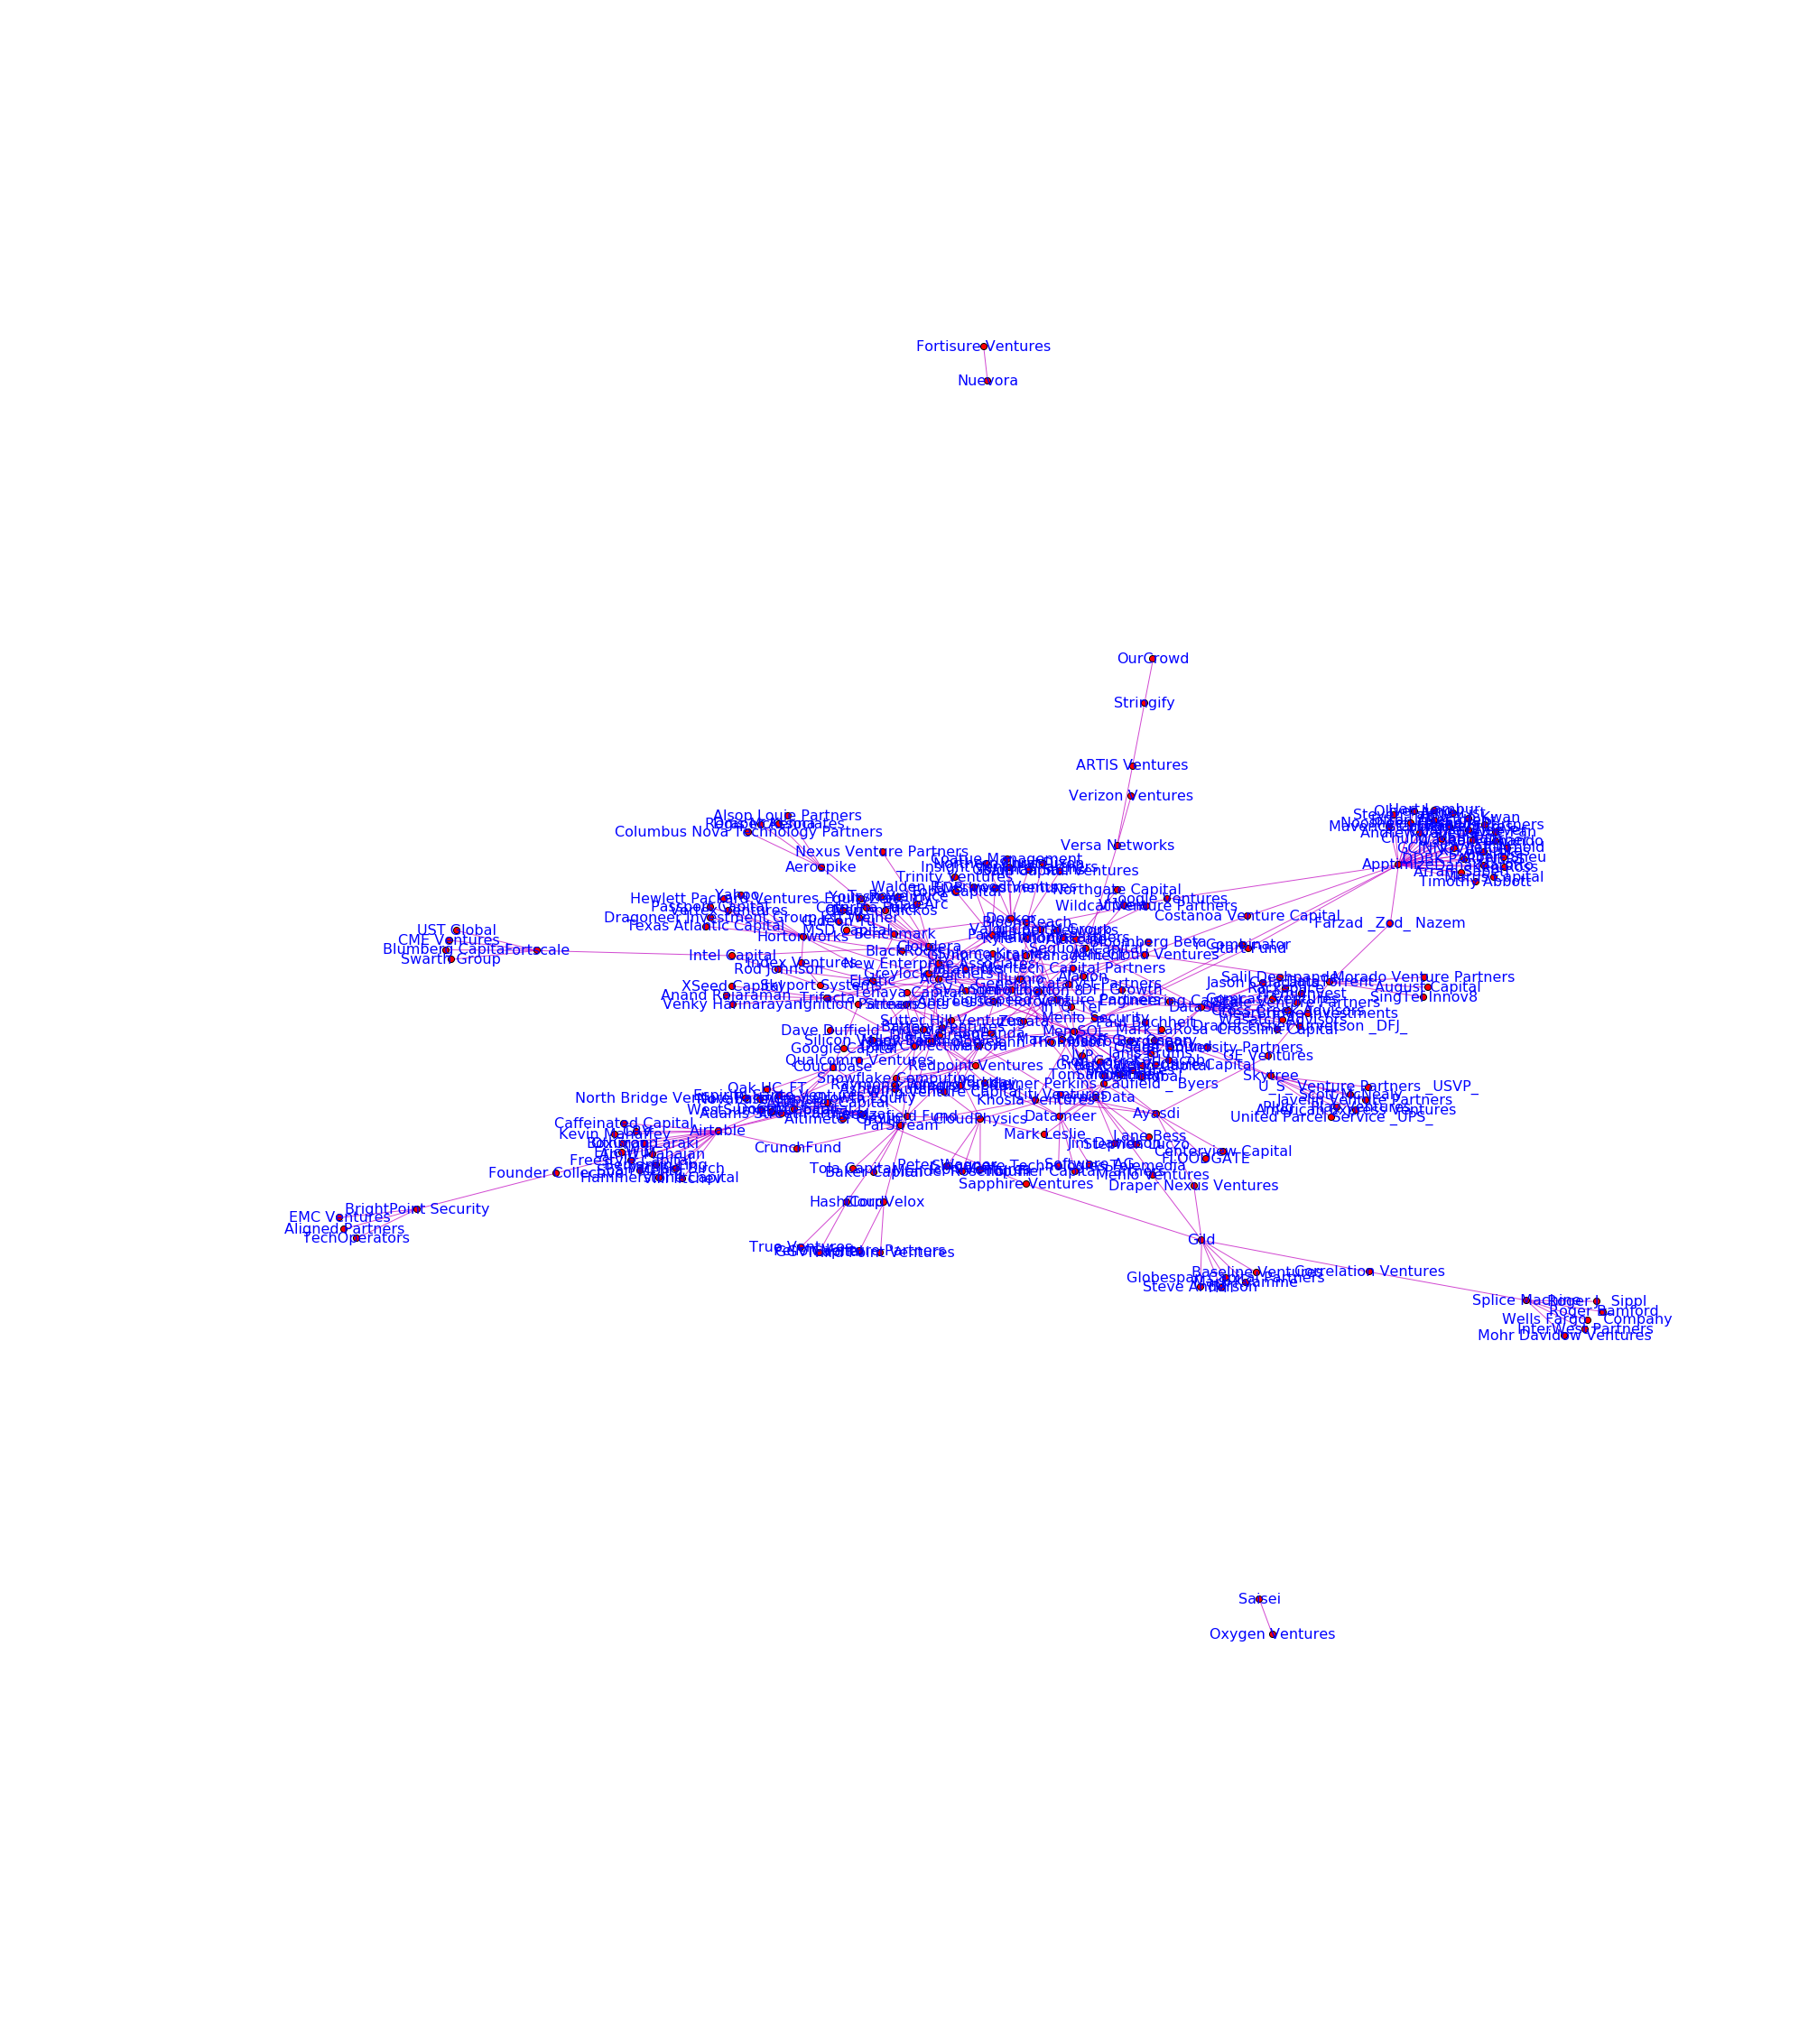

In [129]:
plt.figure(figsize=(35,40))

pos = nx.fruchterman_reingold_layout(Gi)

nx.draw_networkx_nodes(Gi, pos, node_size=50)

nx.draw_networkx_edges(Gi, pos, edgelist=[(u,v) for (u,v,d) in Gi.edges(data=True)], width=1, edge_color="m", alpha=0.7)

nx.draw_networkx_labels(Gi, pos, font_size=16, font_family='sans-serif', font_color="b", alpha=0.2)

plt.axis('off')

plt.show()

In [95]:
Investor_count = Startups_and_Investors[['name','investor']].groupby('investor').count()
Investor_count

,name
investor,
AME Cloud Ventures,6
ARTIS Ventures,2
Accel,24
Adams Street Partners,2
Albert Sheu,1
Aligned Partners,1
Allegis Capital,1
Alsop Louie Partners,2
Altimeter Capital,1


In [135]:
Shared_Investors = Investor_count[ Investor_count['name'] > 1 ]
Shared_Investors.head(10)

,name
investor,
AME Cloud Ventures,6
ARTIS Ventures,2
Accel,24
Adams Street Partners,2
Alsop Louie Partners,2
Andreessen Horowitz,15
Ashton Kutcher,3
August Capital,2
Bain Capital Ventures,3


In [102]:
Gsi = nx.Graph()

List_of_shared_Investors = list(Shared_Investors.index)

for x in Startups_and_Investors[['name', 'investor','raised_amount_usd']].values:
    startup  = fixup(x[0])
    investor = fixup(x[1])
    if investor in List_of_shared_Investors:
        Gsi.add_edge( startup, investor )


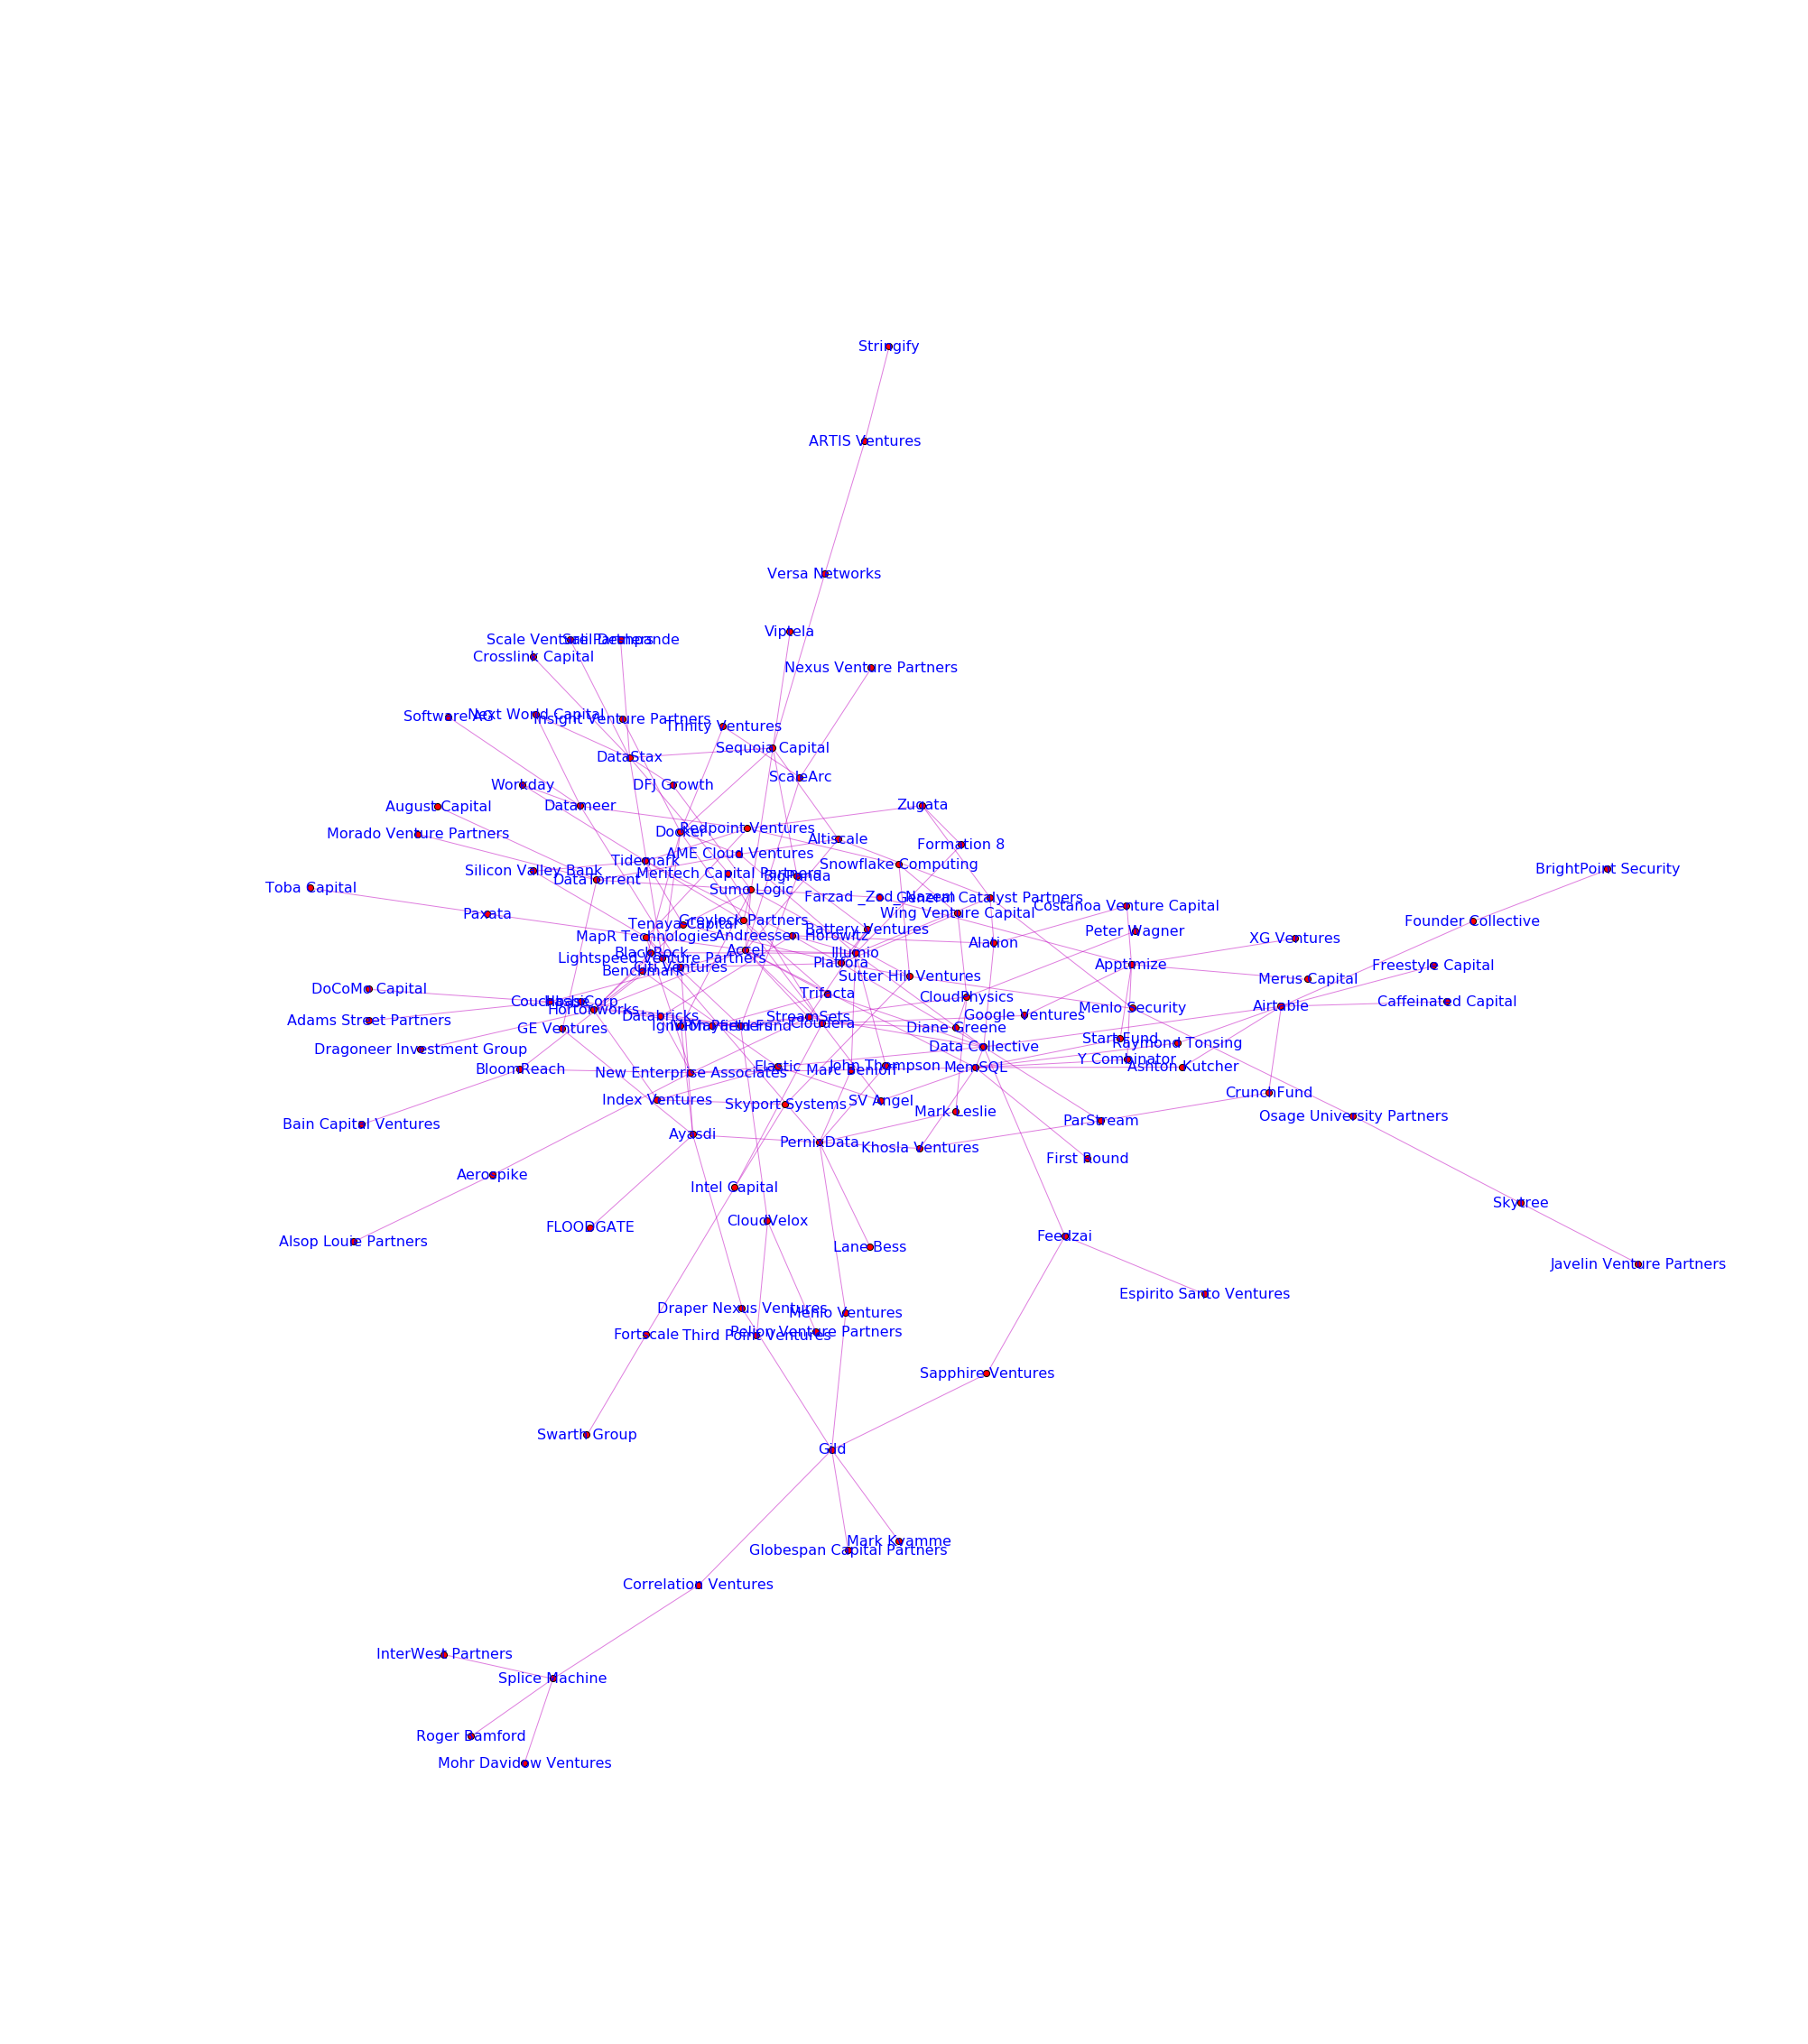

In [128]:
plt.figure(figsize=(35,40))

pos = nx.fruchterman_reingold_layout(Gsi)

nx.draw_networkx_nodes(Gsi, pos, node_size=50)

nx.draw_networkx_edges(Gsi, pos, edgelist=[(u,v) for (u,v,d) in Gsi.edges(data=True)], width=1, edge_color="m", alpha=0.5)

nx.draw_networkx_labels(Gsi, pos, font_size=16, font_family='sans-serif', font_color="b", alpha=0.2)

plt.axis('off')

plt.show()

# Display the graph of Startups that share a common Investor

In [136]:
Startups_with_a_common_Investor = pd.merge( left=Startups_and_Investors, right=Startups_and_Investors, how="inner",
                                           left_on="investor", right_on="investor")[['name_x', 'name_y']].drop_duplicates()

Startups_with_a_common_Investor = Startups_with_a_common_Investor[
                             Startups_with_a_common_Investor['name_x'] != Startups_with_a_common_Investor['name_y'] ]

Startups_with_a_common_Investor.head(10)

,name_x,name_y
8,Aerospike,BloomReach
9,Aerospike,Databricks
10,Aerospike,Elastic
11,Aerospike,MapR Technologies
15,Aerospike,MemSQL
16,Aerospike,StreamSets
28,BloomReach,Aerospike
31,BloomReach,Databricks
32,BloomReach,Elastic
33,BloomReach,MapR Technologies


In [117]:
Gcc = nx.Graph()

for x in Startups_with_a_common_Investor[['name_x', 'name_y']].values:
    startup0  = fixup(x[0])
    startup1 = fixup(x[1])
    Gcc.add_edge( startup0, startup1 )


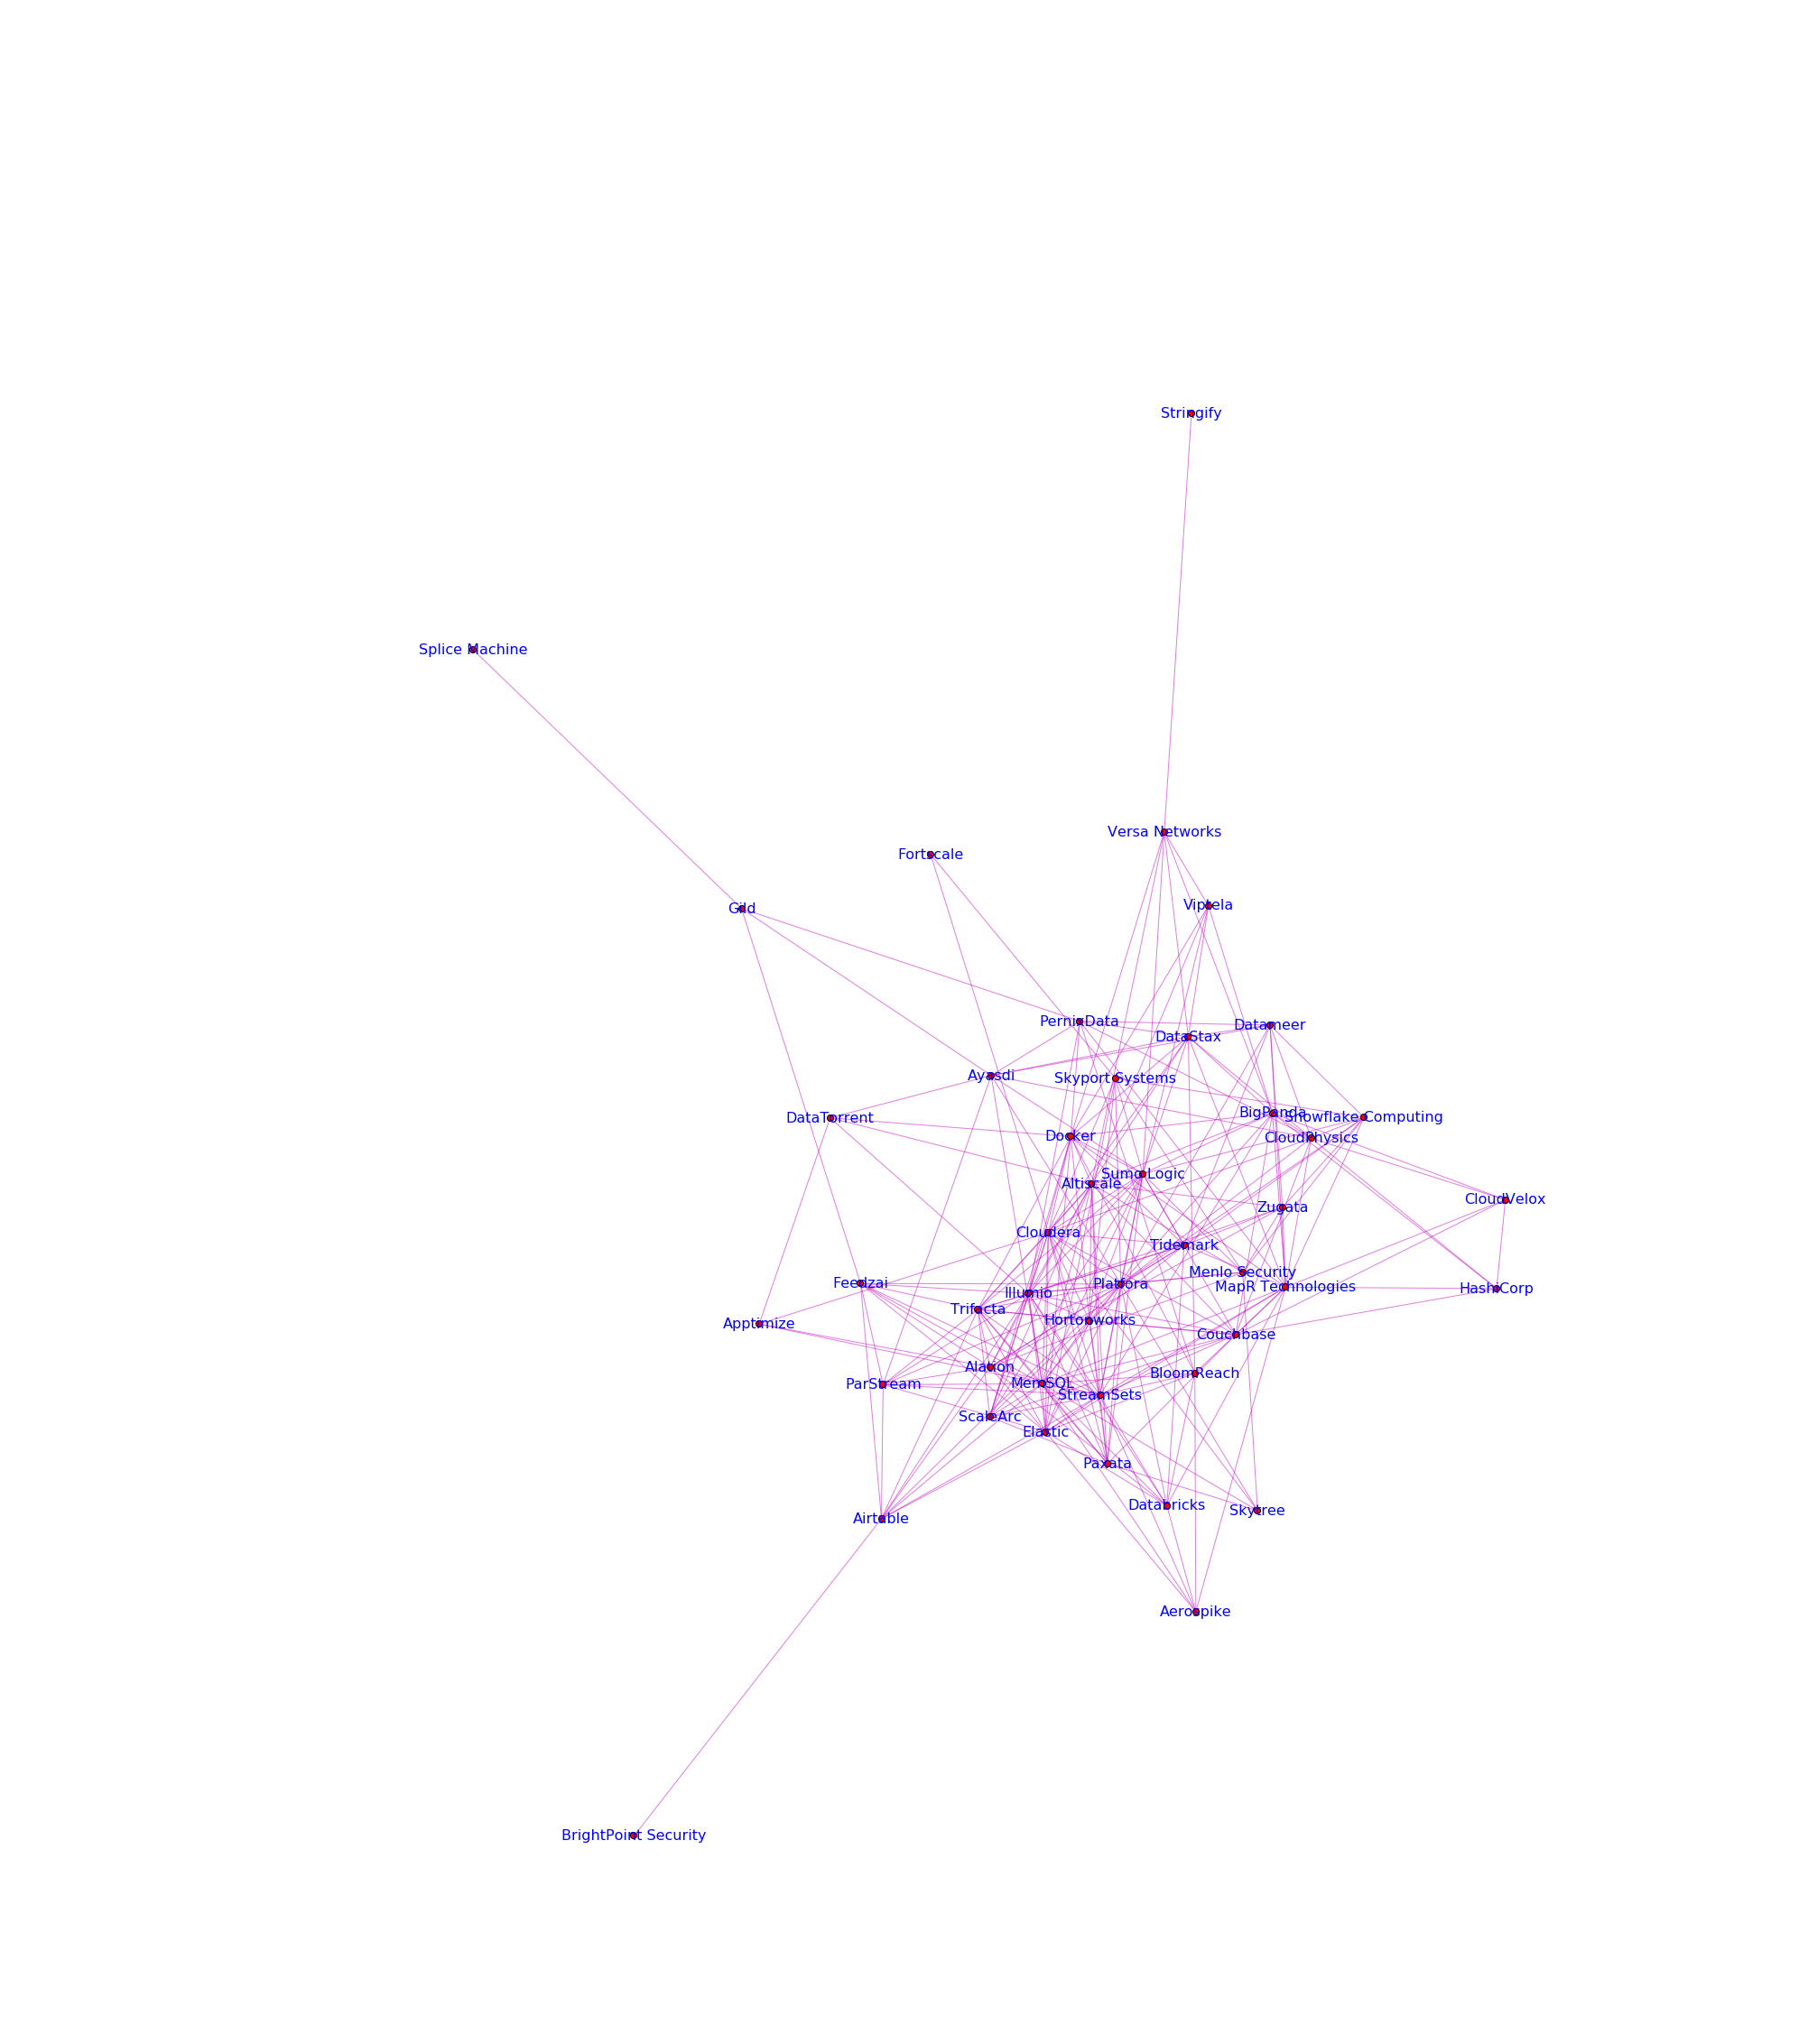

In [126]:
plt.figure(figsize=(35,40))

pos = nx.spring_layout(Gcc)

nx.draw_networkx_nodes(Gcc, pos, node_size=50)

nx.draw_networkx_edges(Gcc, pos, edgelist=[(u,v) for (u,v,d) in Gcc.edges(data=True)], width=1, edge_color="m", alpha=0.5)

nx.draw_networkx_labels(Gcc, pos, font_size=16, font_family='sans-serif', font_color="b", alpha=0.2)

plt.axis('off')

plt.show()

# Plot the ego graph for the largest hub of these Startups

In [146]:
node_and_degree = Gcc.degree()

from operator import itemgetter

# The "main hub" is the node of largest degree; for this graph it is 'Illumio'
(largest_hub, degree) = sorted( node_and_degree.items(), key=itemgetter(1) )[-1]
    
# Create ego graph of main hub (i.e., the graph of radius 1 from the main hub)
hub_ego = nx.ego_graph(Gcc, largest_hub)

largest_hub

'Illumio'

In [161]:
 sorted( node_and_degree.items(), key=itemgetter(1), reverse=True )  # high connectivity among Startups

[('Platfora', 23),
 ('MemSQL', 23),
 ('Illumio', 23),
 ('Sumo Logic', 21),
 ('StreamSets', 21),
 ('Cloudera', 20),
 ('Altiscale', 19),
 ('MapR Technologies', 18),
 ('Trifacta', 18),
 ('Elastic', 17),
 ('Docker', 17),
 ('Hortonworks', 15),
 ('Alation', 15),
 ('Couchbase', 15),
 ('BigPanda', 13),
 ('DataStax', 13),
 ('Tidemark', 13),
 ('Paxata', 12),
 ('CloudPhysics', 12),
 ('ScaleArc', 11),
 ('Feedzai', 10),
 ('Databricks', 10),
 ('Airtable', 10),
 ('ParStream', 10),
 ('Ayasdi', 10),
 ('Menlo Security', 9),
 ('BloomReach', 9),
 ('Datameer', 9),
 ('Snowflake Computing', 9),
 ('PernixData', 9),
 ('Skyport Systems', 8),
 ('Zugata', 8),
 ('Versa Networks', 7),
 ('Aerospike', 6),
 ('Viptela', 6),
 ('Skytree', 5),
 ('CloudVelox', 5),
 ('DataTorrent', 5),
 ('HashiCorp', 5),
 ('Gild', 4),
 ('Apptimize', 4),
 ('Fortscale', 2),
 ('Stringify', 1),
 ('BrightPoint Security', 1),
 ('Splice Machine', 1)]

In [150]:
len(hub_ego.nodes())   #  This main hub has 23 adjacent nodes

24

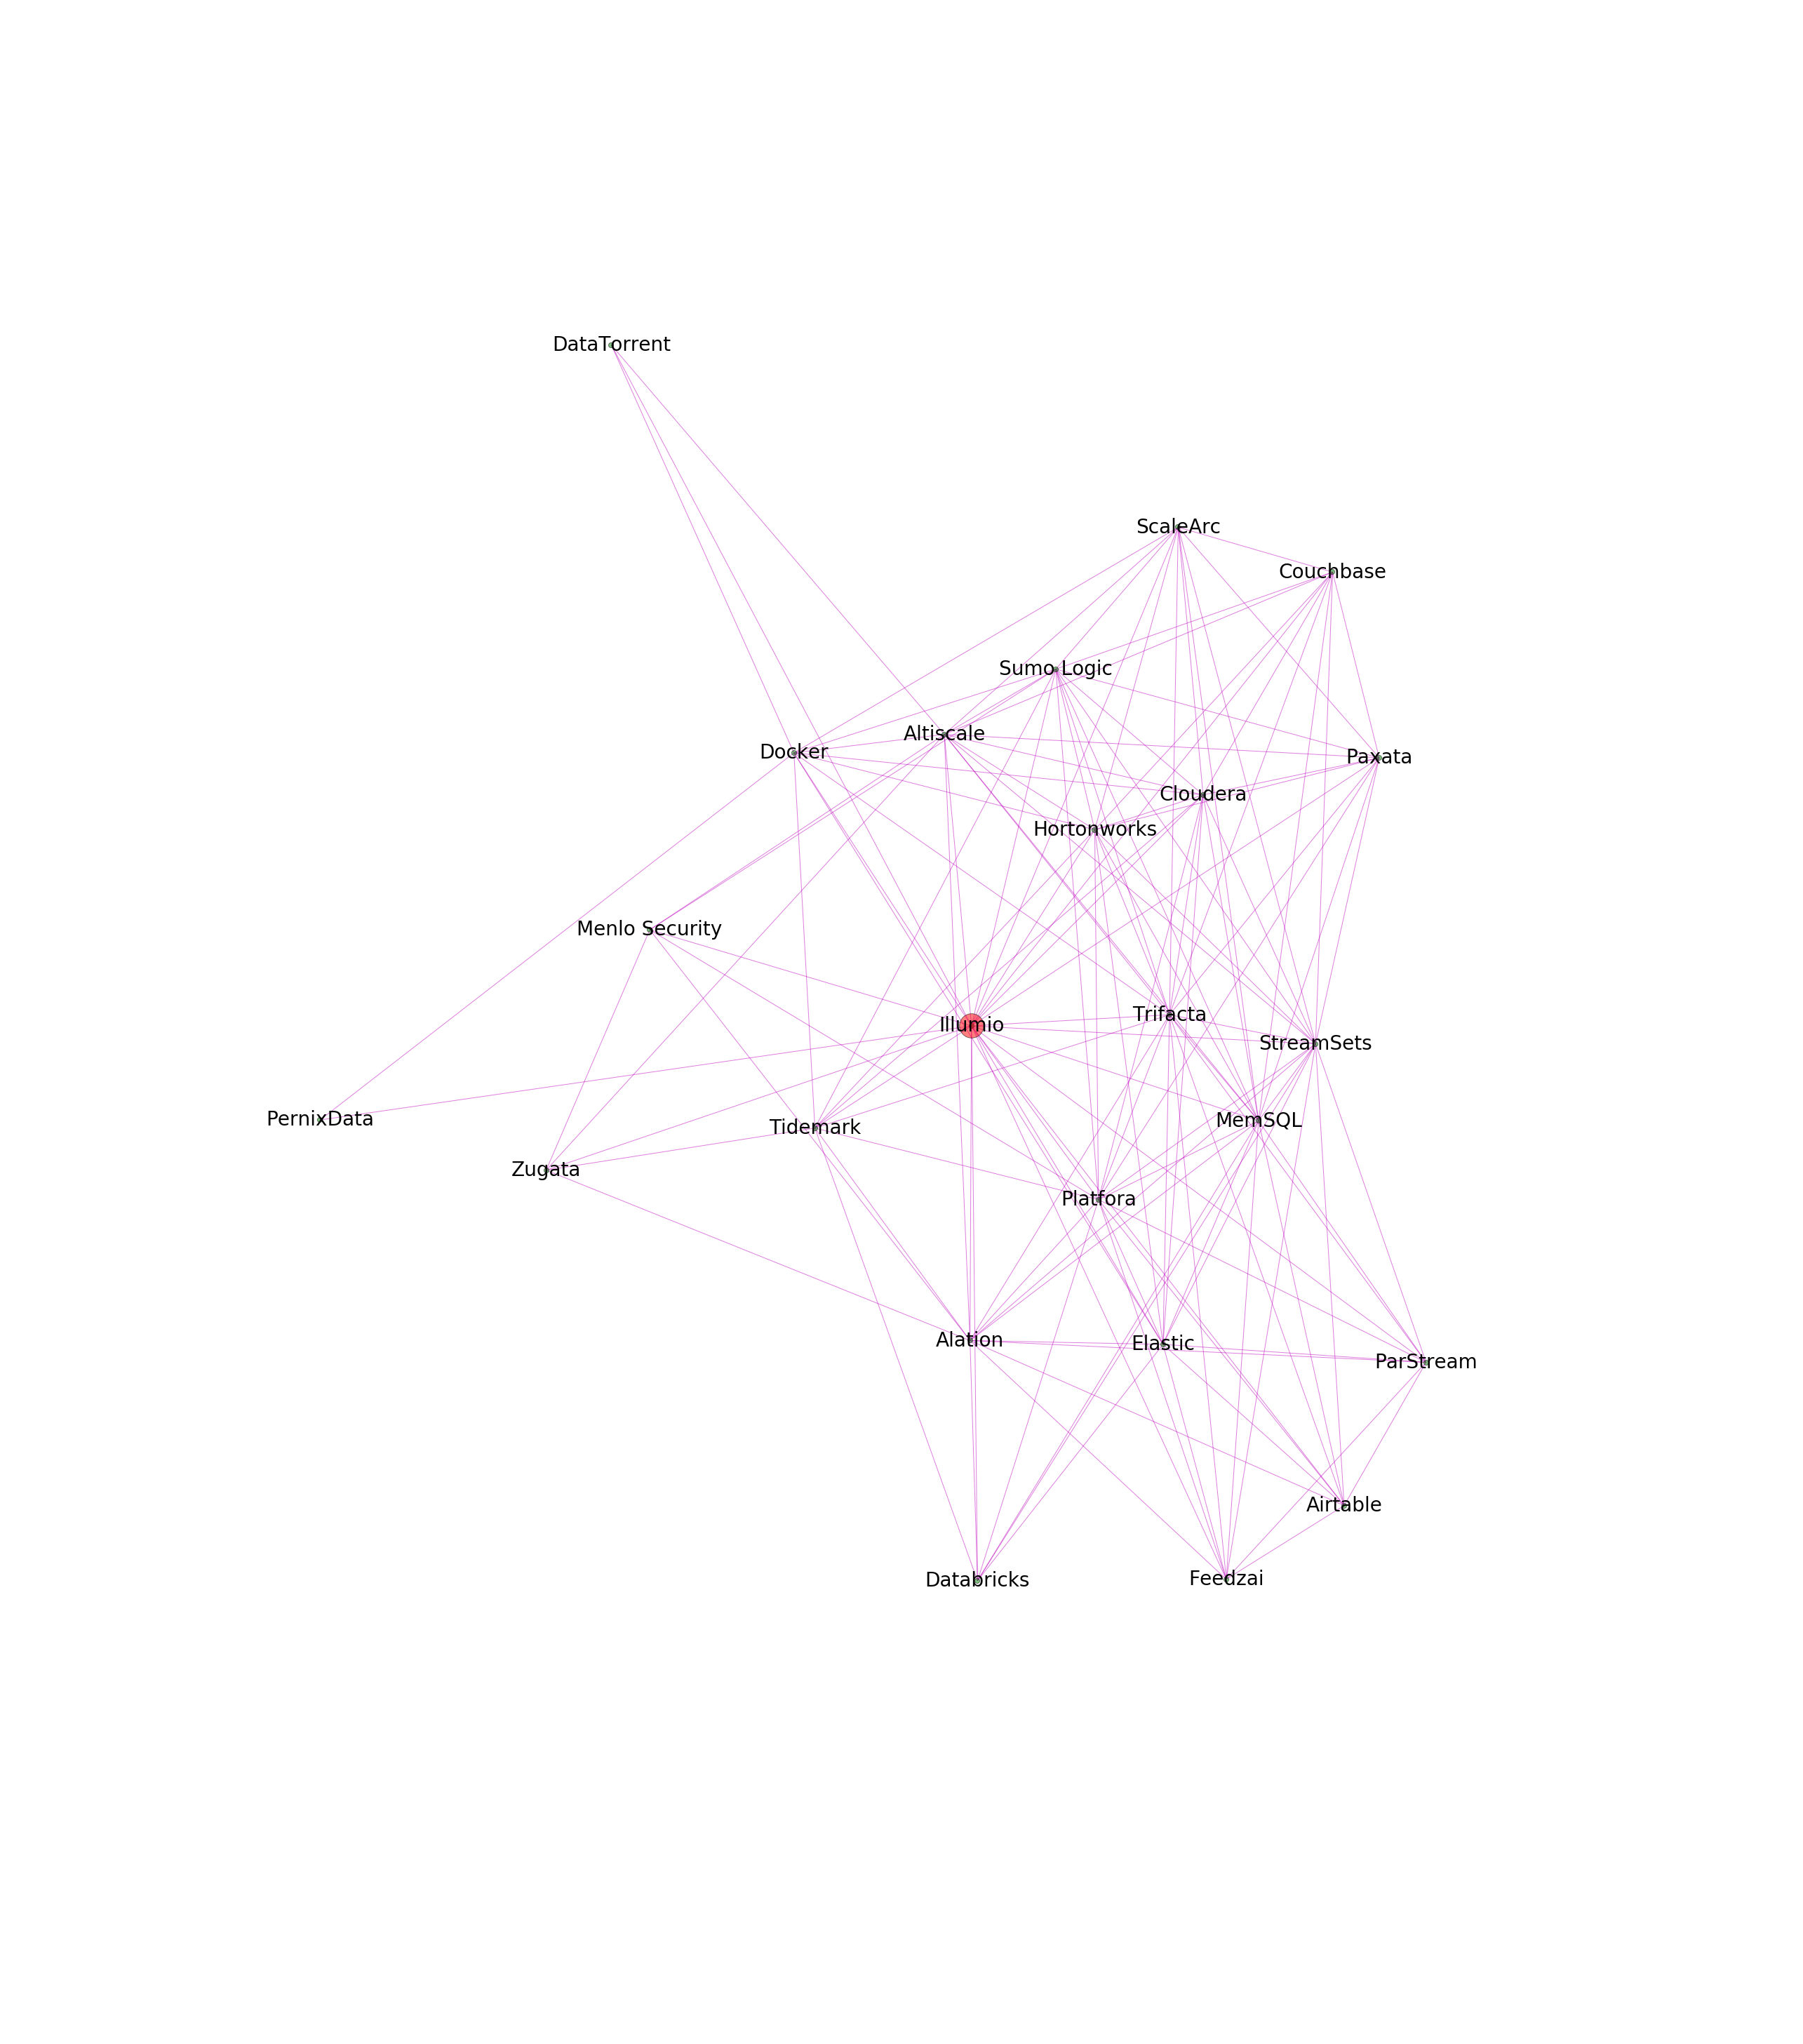

In [149]:
plt.figure(figsize=(35,40))

# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw( hub_ego, pos, node_color='g',node_size=50,
                       font_size=28, font_family='sans-serif', with_labels=True, edge_color='m', alpha=0.5)
    
# Draw ego as large and red
nx.draw_networkx_nodes( hub_ego, pos, nodelist=[largest_hub],
                       font_size=28, font_family='sans-serif', node_size=1200,   node_color='r', alpha=0.5)
    
# plt.savefig('ego_graph.png')
plt.show()

# Compute Centrality of nodes in this Graph

See:  http://networkx.github.io/documentation/networkx-1.10/reference/algorithms.centrality.html

##  Degree Centrality

In [162]:
C1 = nx.degree_centrality(Gcc)

sorted( C1.items(), key=itemgetter(1), reverse=True )

[('Platfora', 0.5227272727272727),
 ('MemSQL', 0.5227272727272727),
 ('Illumio', 0.5227272727272727),
 ('Sumo Logic', 0.4772727272727273),
 ('StreamSets', 0.4772727272727273),
 ('Cloudera', 0.4545454545454546),
 ('Altiscale', 0.4318181818181818),
 ('MapR Technologies', 0.4090909090909091),
 ('Trifacta', 0.4090909090909091),
 ('Elastic', 0.38636363636363635),
 ('Docker', 0.38636363636363635),
 ('Hortonworks', 0.34090909090909094),
 ('Alation', 0.34090909090909094),
 ('Couchbase', 0.34090909090909094),
 ('BigPanda', 0.29545454545454547),
 ('DataStax', 0.29545454545454547),
 ('Tidemark', 0.29545454545454547),
 ('Paxata', 0.2727272727272727),
 ('CloudPhysics', 0.2727272727272727),
 ('ScaleArc', 0.25),
 ('Feedzai', 0.2272727272727273),
 ('Databricks', 0.2272727272727273),
 ('Airtable', 0.2272727272727273),
 ('ParStream', 0.2272727272727273),
 ('Ayasdi', 0.2272727272727273),
 ('Menlo Security', 0.20454545454545456),
 ('BloomReach', 0.20454545454545456),
 ('Datameer', 0.20454545454545456),
 (

## Closeness Centrality

In [166]:
C2 = nx.closeness_centrality(Gcc)

sorted( C2.items(), key=itemgetter(1), reverse=True )

[('Platfora', 0.6567164179104478),
 ('MemSQL', 0.6567164179104478),
 ('Illumio', 0.6567164179104478),
 ('Sumo Logic', 0.6376811594202898),
 ('StreamSets', 0.6376811594202898),
 ('Trifacta', 0.6111111111111112),
 ('Elastic', 0.6027397260273972),
 ('Cloudera', 0.6027397260273972),
 ('Altiscale', 0.6027397260273972),
 ('Docker', 0.6027397260273972),
 ('MapR Technologies', 0.5945945945945946),
 ('Hortonworks', 0.5641025641025641),
 ('Alation', 0.5641025641025641),
 ('Couchbase', 0.5641025641025641),
 ('CloudPhysics', 0.5569620253164557),
 ('DataStax', 0.55),
 ('Tidemark', 0.55),
 ('BigPanda', 0.5432098765432098),
 ('Paxata', 0.5432098765432098),
 ('Ayasdi', 0.5432098765432098),
 ('ScaleArc', 0.5301204819277109),
 ('BloomReach', 0.5238095238095238),
 ('Datameer', 0.5176470588235295),
 ('PernixData', 0.5176470588235295),
 ('Feedzai', 0.5116279069767442),
 ('Snowflake Computing', 0.5116279069767442),
 ('ParStream', 0.5116279069767442),
 ('Zugata', 0.5116279069767442),
 ('Databricks', 0.505747

## Betweenness Centrality

In [167]:
C3 = nx.betweenness_centrality(Gcc)

sorted( C3.items(), key=itemgetter(1), reverse=True )

[('Platfora', 0.07841156868127148),
 ('Cloudera', 0.07093408896937989),
 ('MemSQL', 0.06957559554425966),
 ('Illumio', 0.06306678368513575),
 ('Sumo Logic', 0.06224516453571749),
 ('MapR Technologies', 0.058458587520099296),
 ('Altiscale', 0.05167509956277952),
 ('Gild', 0.046307762005436424),
 ('Airtable', 0.045454545454545456),
 ('Versa Networks', 0.045454545454545456),
 ('Docker', 0.04429167401860776),
 ('StreamSets', 0.04096803559618707),
 ('Ayasdi', 0.03909086165708055),
 ('Feedzai', 0.032359732857674336),
 ('Couchbase', 0.030348153912792084),
 ('Elastic', 0.028449978039990408),
 ('PernixData', 0.02843003120491752),
 ('BigPanda', 0.02794877404853253),
 ('DataStax', 0.026899555340644827),
 ('CloudPhysics', 0.02500988150681076),
 ('Alation', 0.021957801524037722),
 ('Trifacta', 0.01835111824799121),
 ('Tidemark', 0.011241028737268824),
 ('Skyport Systems', 0.010612762050950542),
 ('Menlo Security', 0.007198692469492121),
 ('Datameer', 0.006934033783928076),
 ('Snowflake Computing', 

## Eigenvector Centrality

In [168]:
C4 = nx.eigenvector_centrality(Gcc)

sorted( C4.items(), key=itemgetter(1), reverse=True )

[('Illumio', 0.27276547290257497),
 ('MemSQL', 0.26533900019381207),
 ('StreamSets', 0.26031955893291703),
 ('Platfora', 0.251891217426414),
 ('Trifacta', 0.24461674290053947),
 ('Sumo Logic', 0.24193170920122894),
 ('Cloudera', 0.23638526342371338),
 ('Altiscale', 0.2191605321163072),
 ('Hortonworks', 0.21368370496888428),
 ('Elastic', 0.20664629505955556),
 ('Couchbase', 0.1869580828273725),
 ('Docker', 0.18393545979524797),
 ('Alation', 0.1785801370518124),
 ('Paxata', 0.17755883727125107),
 ('ScaleArc', 0.1688620136139955),
 ('Tidemark', 0.15889900416662886),
 ('MapR Technologies', 0.15640379681386946),
 ('ParStream', 0.13735672799315152),
 ('Feedzai', 0.13291942650730235),
 ('Airtable', 0.1322035363790636),
 ('BigPanda', 0.13028681593431302),
 ('Databricks', 0.12991933716189047),
 ('DataStax', 0.11731083720855207),
 ('Menlo Security', 0.10086880862264941),
 ('CloudPhysics', 0.1004547265364779),
 ('BloomReach', 0.09922784824268382),
 ('Skyport Systems', 0.09167475724595792),
 ('Aya